In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
data = pd.read_csv ('/work/Marmara.csv')
data

,date,promotion_name,promoPosition,pagetype,contentgroup_1,contentgroup_2,views,clicks,position,CTR,Type
0,2022-07-15,Embarquement immédiat|Envolez-vous direction n...,Home CM – bonnes affaires grandes-2,HomePage,Home,Club Marmara,623.0,49.0,2.0,7.87,Autre
1,2022-07-14,Club Marmara Madina,Bon Plan-6,HomePage,Home,Club Marmara,4376.0,27.0,6.0,0.62,Bons Plans
2,2022-07-14,Embarquement immédiat|Envolez-vous direction n...,Home CM – bonnes affaires grandes-2,HomePage,Home,Club Marmara,5947.0,355.0,2.0,5.97,Autre
3,2022-07-14,Club Marmara Pueblo Andaluz,Bon Plan-1,HomePage,Home,Club Marmara,4787.0,22.0,1.0,0.46,Bons Plans
4,2022-07-14,Majorque|Club Marmara Del Mar à partir de 499€,Home CM – bonnes affaires petites-5,HomePage,Home,Club Marmara,5947.0,64.0,5.0,1.08,Autre
...,...,...,...,...,...,...,...,...,...,...,...
2118,2021-07-01,Réservez Primo Hiver,Home CM – bonnes affaires grandes-1,HomePage,Home,Club Marmara,3840.0,86.0,1.0,2.24,Promotions
2119,2021-07-01,Majorque|Club Marmara Del Mar à partir de 629€,Home CM – bonnes affaires petites-3,HomePage,Home,Club Marmara,3838.0,61.0,3.0,1.59,Autre
2120,2021-07-01,Club Marmara Pueblo Andaluz,Bon Plan-1,HomePage,Home,Club Marmara,3445.0,40.0,1.0,1.16,Bons Plans
2121,2021-07-01,Embarquement immédiat|Envolez-vous direction n...,Home CM – bonnes affaires grandes-2,HomePage,Home,Club Marmara,3838.0,193.0,2.0,5.03,Autre


In [ ]:
data['Type'].unique()

array(['Autre', 'Bons Plans', 'Promotions', 'Sejour tout compris',
       'Crazy', 'Foliday', nan], dtype=object)

In [ ]:
data=data.drop(columns=['promotion_name','pagetype','contentgroup_1','position','contentgroup_2','views','clicks'])
data['log_CTR']=data['CTR'].apply(lambda x : np.log(x))
data

,date,promoPosition,CTR,Type,log_CTR
0,2022-07-15,Home CM – bonnes affaires grandes-2,7.87,Autre,2.063058
1,2022-07-14,Bon Plan-6,0.62,Bons Plans,-0.478036
2,2022-07-14,Home CM – bonnes affaires grandes-2,5.97,Autre,1.786747
3,2022-07-14,Bon Plan-1,0.46,Bons Plans,-0.776529
4,2022-07-14,Home CM – bonnes affaires petites-5,1.08,Autre,0.076961
...,...,...,...,...,...
2118,2021-07-01,Home CM – bonnes affaires grandes-1,2.24,Promotions,0.806476
2119,2021-07-01,Home CM – bonnes affaires petites-3,1.59,Autre,0.463734
2120,2021-07-01,Bon Plan-1,1.16,Bons Plans,0.148420
2121,2021-07-01,Home CM – bonnes affaires grandes-2,5.03,Autre,1.615420


In [ ]:
data['promoPosition'].value_counts()


Home CM – bonnes affaires grandes-1    422
Home CM – bonnes affaires grandes-2    413
Home CM – bonnes affaires petites-3    381
Bon Plan-1                             193
Bon Plan-2                             186
Bon Plan-3                             151
Home CM – bonnes affaires petites-4    123
Home CM – bonnes affaires petites-5     90
Bon Plan-6                              58
Bon Plan-4                              51
Bon Plan-5                              45
Home CM – bonnes affaires petites-2      2
Name: promoPosition, dtype: int64

In [ ]:
#feature engineering
data.date=pd.to_datetime(data.date,errors='coerce')
data['jour']=data.date.dt.day_name()
data['mois']=data.date.dt.month_name()
data=data.rename(columns={'Type':'type_banniere'})
data

,date,promoPosition,CTR,type_banniere,log_CTR,jour,mois
0,2022-07-15,Home CM – bonnes affaires grandes-2,7.87,Autre,2.063058,Friday,July
1,2022-07-14,Bon Plan-6,0.62,Bons Plans,-0.478036,Thursday,July
2,2022-07-14,Home CM – bonnes affaires grandes-2,5.97,Autre,1.786747,Thursday,July
3,2022-07-14,Bon Plan-1,0.46,Bons Plans,-0.776529,Thursday,July
4,2022-07-14,Home CM – bonnes affaires petites-5,1.08,Autre,0.076961,Thursday,July
...,...,...,...,...,...,...,...
2118,2021-07-01,Home CM – bonnes affaires grandes-1,2.24,Promotions,0.806476,Thursday,July
2119,2021-07-01,Home CM – bonnes affaires petites-3,1.59,Autre,0.463734,Thursday,July
2120,2021-07-01,Bon Plan-1,1.16,Bons Plans,0.148420,Thursday,July
2121,2021-07-01,Home CM – bonnes affaires grandes-2,5.03,Autre,1.615420,Thursday,July


In [ ]:
data.isna().sum()

date             8
promoPosition    8
CTR              8
type_banniere    8
log_CTR          8
jour             8
mois             8
dtype: int64

In [ ]:
list_features=['promoPosition','type_banniere','jour', 'mois']
X_cat = pd.get_dummies(data[list_features],drop_first = 1)
X_cat

,promoPosition_Bon Plan-2,promoPosition_Bon Plan-3,promoPosition_Bon Plan-4,promoPosition_Bon Plan-5,promoPosition_Bon Plan-6,promoPosition_Home CM – bonnes affaires grandes-1,promoPosition_Home CM – bonnes affaires grandes-2,promoPosition_Home CM – bonnes affaires petites-2,promoPosition_Home CM – bonnes affaires petites-3,promoPosition_Home CM – bonnes affaires petites-4,...,mois_December,mois_February,mois_January,mois_July,mois_June,mois_March,mois_May,mois_November,mois_October,mois_September
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2119,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2121,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_cat=X_cat.rename(columns={
#'promoPosition_Bon Plan-1':'bon_plan1',
'promoPosition_Bon Plan-2':'bon_plan2',
'promoPosition_Bon Plan-3':'bon_plan3',
'promoPosition_Bon Plan-4':'bon_plan4',
'promoPosition_Bon Plan-5':'bon_plan5',
'promoPosition_Bon Plan-6':'bon_plan6',

'promoPosition_Home CM – bonnes affaires grandes-1':'CM–bon_affai_grandes-1',
'promoPosition_Home CM – bonnes affaires grandes-2':'CM–bon_affai_grandes-2',
'promoPosition_Home CM – bonnes affaires petites-2':'CM–bon_affai_petites-2',
'promoPosition_Home CM – bonnes affaires petites-3':'CM–bon_affai_petites-3',
'promoPosition_Home CM – bonnes affaires petites-4':'CM–bon_affai_petites-4',
'promoPosition_Home CM – bonnes affaires petites-5':'CM–bon_affai_petites-5',
#'position_position1':'position1',
#'position_position2':'position2',
#'position_position3':'position3',
#'position_position4':'position4',
#'position_position5':'position5',
#'position_position6':'position6',

'type_banniere_Autre':'Autre',
'type_banniere_Bons Plans':'Bons plan',
'type_banniere_Crazy':'Crazy',
'type_banniere_Foliday':'Foliday',
'type_banniere_Promotions':'Promotions',
'type_banniere_Sejour tout compris':'Sejour tout compris',

'jour_Friday':'Friday',
'jour_Monday':'Monday',
'jour_Saturday':'Saturday',
'jour_Sunday':'Sunday',
'jour_Thursday':'Thursday',
'jour_Tuesday':'Tuesday',
'jour_Wednesday':'Wednesday',
'mois_April':'April',
'mois_August':'August',
'mois_December':'December',
'mois_February':'February',
'mois_January':'January',
'mois_July':'July',
'mois_June':'June',
'mois_March':'March',
'mois_May':'May',
'mois_November':'November',
'mois_October':'October',
'mois_September':'September'})

In [ ]:
x=X_cat
x


,bon_plan2,bon_plan3,bon_plan4,bon_plan5,bon_plan6,CM–bon_affai_grandes-1,CM–bon_affai_grandes-2,CM–bon_affai_petites-2,CM–bon_affai_petites-3,CM–bon_affai_petites-4,...,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2119,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2121,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_train=x.loc[data.date<='2022-07-01']
y_train=data.loc[data.date<='2022-07-01','log_CTR']

X_test = x.loc[data.date>'2022-07-01']
y_test = data.loc[data.date>'2022-07-01','log_CTR']

print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (1994, 33)
X_test shape : (121, 33)
y_train shape : (1994,)
y_test shape : (121,)


In [ ]:
!pip install statsmodels==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 49.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#print the intercept
print(model.intercept_)

2689979981290.185


In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
bon_plan2,-8.208054e-03
bon_plan3,-1.668759e-01
bon_plan4,-2.385591e-01
bon_plan5,-2.632563e-01
bon_plan6,-2.344186e-01
CM–bon_affai_grandes-1,-2.689980e+12
CM–bon_affai_grandes-2,-2.689980e+12
CM–bon_affai_petites-2,-2.689980e+12
CM–bon_affai_petites-3,-2.689980e+12
CM–bon_affai_petites-4,-2.689980e+12


In [ ]:
predictions = model.predict(X_test)
predictions

array([ 1.13085938, -0.0625    ,  1.16650391,  0.171875  , -0.18261719,
        0.92626953, -0.09130859,  1.23388672, -0.13378906,  0.00488281,
        0.16357422,  0.15917969, -0.09570312,  1.22949219, -0.18701172,
        0.921875  ,  1.16210938,  0.18994141, -0.15673828,  0.19824219,
        1.19238281, -0.10742188,  0.95214844,  1.19238281,  1.25976562,
       -0.10302734, -0.09863281,  1.13037109, -0.21875   ,  0.89013672,
        1.19775391,  1.13037109, -0.12744141,  0.13574219, -0.03125   ,
        0.89013672,  0.12744141, -0.18652344, -0.15771484,  0.83105469,
        0.07666016, -0.09033203,  1.07128906, -0.22900391, -0.27783203,
        0.06835938,  1.13867188, -0.16210938,  1.14550781,  1.21289062,
       -0.20361328, -0.01611328, -0.08740234,  0.90527344, -0.08349609,
        0.15087891,  0.14257812, -0.03076172, -0.09814453,  1.19824219,
        1.13085938,  0.13623047,  0.12792969, -0.21826172,  0.890625  ,
       -0.10205078,  0.16357422,  0.171875  , -0.0625    , -0.09

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_CTR'>

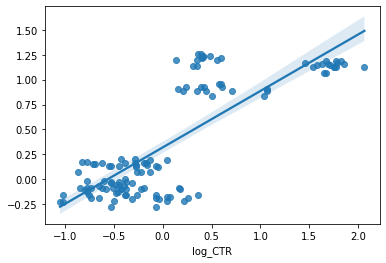

In [ ]:
sns.regplot(y_test,predictions)


In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                log_CTR   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     346.3
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:54:27   Log-Likelihood:                -753.43
No. Observations:                1994   AIC:                             1573.
Df Residuals:                    1961   BIC:                             1758.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


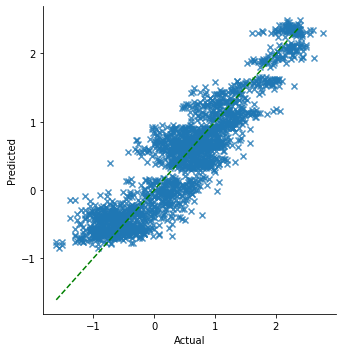

MAE 0.28260988452588043
MAPE 4171968393056.9214
MSE :  0.12469848866687519


In [ ]:

# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

df_results_train = pd.DataFrame({'Actual': y_train , 'Predicted': y_train_pred})
df_results_test = pd.DataFrame({'Actual': y_test , 'Predicted': y_test_pred})
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_train, fit_reg=False, markers = "x")
d_line= np.arange(df_results_train.min().min(), df_results_train.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")

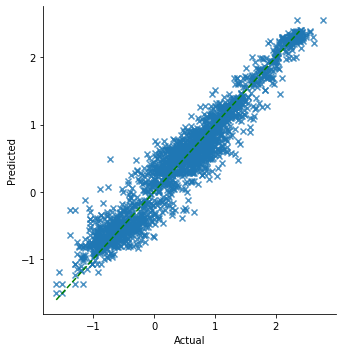

MAE 0.18168913011524446
MAPE 4296654242254.8945
MSE :  0.05794005586577063


In [ ]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Get predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

df_results_train = pd.DataFrame({'Actual': y_train , 'Predicted': y_train_pred})
df_results_test = pd.DataFrame({'Actual': y_test , 'Predicted': y_test_pred})
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_train, fit_reg=False, markers = "x")
d_line= np.arange(df_results_train.min().min(), df_results_train.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")


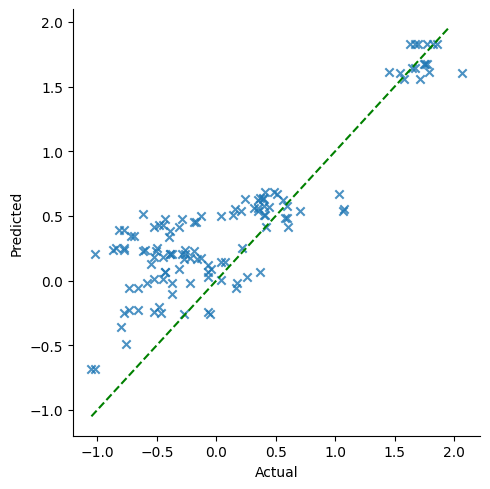

MAE 0.18144168020601295
MAPE 4069423263149.627
MSE :  0.057948712225658276


In [ ]:
# with position MSE :  0.06
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_test, fit_reg=False, markers = "x")
d_line= np.arange(df_results_test.min().min(), df_results_test.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")

<BarContainer object of 33 artists>

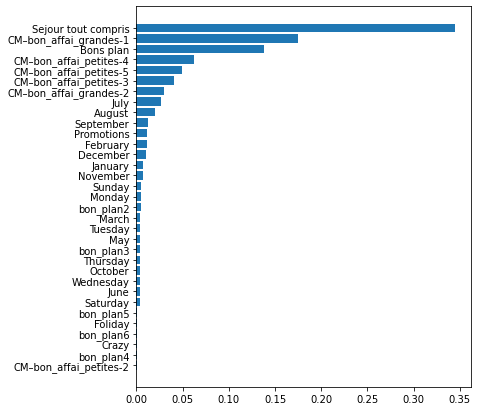

In [ ]:
plt.figure(figsize = (6,7))
importances = pd.DataFrame({"features" : X_train.columns,
                            "importance" : reg.feature_importances_}).sort_values("importance")

plt.barh(importances.features, importances.importance)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17c78468-df45-44b7-9d10-8043693c30e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>